In [6]:
import os
import random
import numpy as np
import pandas as pd
import networkx as nx
from causallearn.search.ConstraintBased.PC import pc
from causallearn.utils.cit import kci
from causallearn.utils.cit import fisherz
from plotting_utils import causal_learn_to_networkx, plot_and_save_graph
from true_graph import create_true_graph_student, create_true_graph_student_small, create_true_graph_adult, create_true_graph_adult_small
from evaluation import evaluate_graph

In [7]:
def set_random_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)

In [8]:
def run_pc_algorithm(data, labels, alpha=0.01, stable=True, uc_rule=2, seed=None):
    if seed is not None:
        set_random_seed(seed)
    
    # Convert boolean to floats
    data = data.astype(float)

    try:
        print(f"Running PC algorithm with alpha={alpha}, stable={stable}, uc_rule={uc_rule}")
        cg_pc = pc(data, alpha=alpha, stable=stable, uc_rule=uc_rule, indep_test=fisherz)

        # CausalLearn to NetworkX 
        nx_graph = causal_learn_to_networkx(cg_pc.G)

        # Remove bidirectional edges
        bidirectional_edges = [(u, v) for u, v in nx_graph.edges if nx_graph.has_edge(v, u)]
        for u, v in bidirectional_edges:
            nx_graph.remove_edge(v, u)

        return nx_graph
    except Exception as e:
        print(f"Error running PC algorithm: {e}")
        raise

In [9]:
def main():
    # Specify dataset
    dataset = 'adult_small'  # Change to 'adult', 'adult_small', 'student', or 'student_small'
    
    if dataset == 'adult':
        data_file = 'data/processed_adult.csv'
        df_encoded = pd.read_csv(data_file)
        labels = df_encoded.columns.tolist()
        data = df_encoded.to_numpy()
        true_graph = create_true_graph_adult()

    elif dataset == 'adult_small':
        data_file = 'data/processed_adult_small.csv'
        df_encoded = pd.read_csv(data_file)
        labels = df_encoded.columns.tolist()
        data = df_encoded.to_numpy()
        true_graph = create_true_graph_adult_small()

    elif dataset == 'student':
        data_file = 'data/processed_student.csv'
        df_encoded = pd.read_csv(data_file)
        labels = df_encoded.columns.tolist()
        data = df_encoded.to_numpy()
        true_graph = create_true_graph_student()

    elif dataset == 'student_small':
        data_file = 'data/processed_student_small.csv'
        df_encoded = pd.read_csv(data_file)
        labels = df_encoded.columns.tolist()
        data = df_encoded.to_numpy()
        true_graph = create_true_graph_student_small()

    else:
        raise ValueError("Invalid dataset specified. Choose 'adult', 'adult_small', 'student', or 'student_small'.")

    print(f"Processing dataset: {dataset}")

    estimated_graph_1 = run_pc_algorithm(data, labels, alpha=0.1, stable=True, uc_rule=0, seed=42)

    plot_and_save_graph(estimated_graph_1, labels, 'causal_graph_first_run')

    estimated_graph_2 = run_pc_algorithm(data, labels, alpha=0.1, stable=True, uc_rule=1, seed=42)

    plot_and_save_graph(estimated_graph_2, labels, 'causal_graph_second_run')

    estimated_graph_3 = run_pc_algorithm(data, labels, alpha=0.1, stable=True, uc_rule=2, seed=42)

    plot_and_save_graph(estimated_graph_3, labels, 'causal_graph_third_run')

    # Evaluate
    shd_1, recall_1, precision_1 = evaluate_graph(estimated_graph_1, true_graph)
    print("Evaluation of the first estimated graph:")
    print(f"Structural Hamming Distance (SHD): {shd_1}")
    print(f"Recall: {recall_1}")
    print(f"Precision: {precision_1}")

    shd_2, recall_2, precision_2 = evaluate_graph(estimated_graph_2, true_graph)
    print("Evaluation of the second estimated graph:")
    print(f"Structural Hamming Distance (SHD): {shd_2}")
    print(f"Recall: {recall_2}")
    print(f"Precision: {precision_2}")

    shd_3, recall_3, precision_3 = evaluate_graph(estimated_graph_3, true_graph)
    print("Evaluation of the third estimated graph:")
    print(f"Structural Hamming Distance (SHD): {shd_3}")
    print(f"Recall: {recall_3}")
    print(f"Precision: {precision_3}")

    return estimated_graph_3

Processing dataset: adult_small
Running PC algorithm with alpha=0.1, stable=True, uc_rule=0


  0%|          | 0/7 [00:00<?, ?it/s]

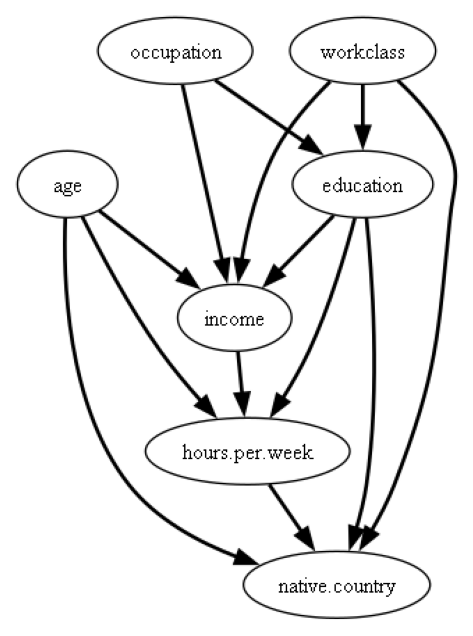

Running PC algorithm with alpha=0.1, stable=True, uc_rule=1


  0%|          | 0/7 [00:00<?, ?it/s]

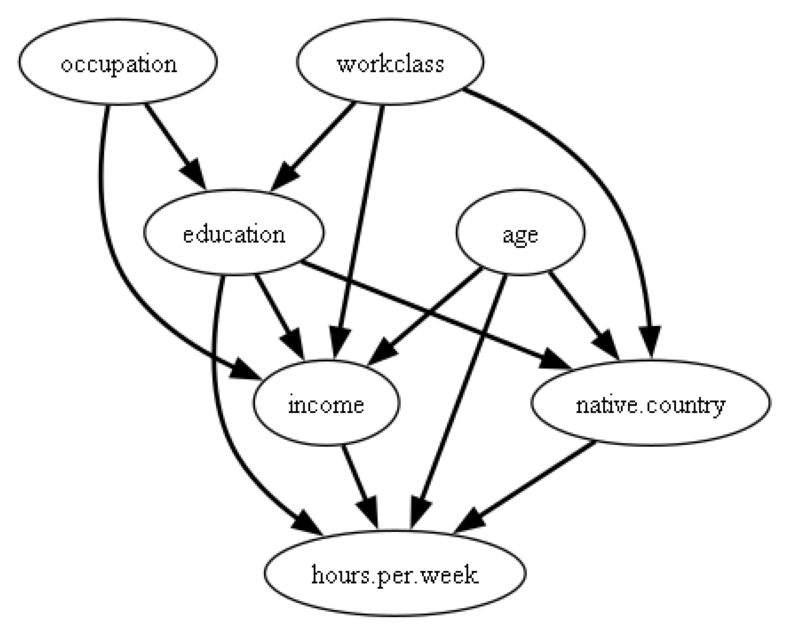

Running PC algorithm with alpha=0.1, stable=True, uc_rule=2


  0%|          | 0/7 [00:00<?, ?it/s]

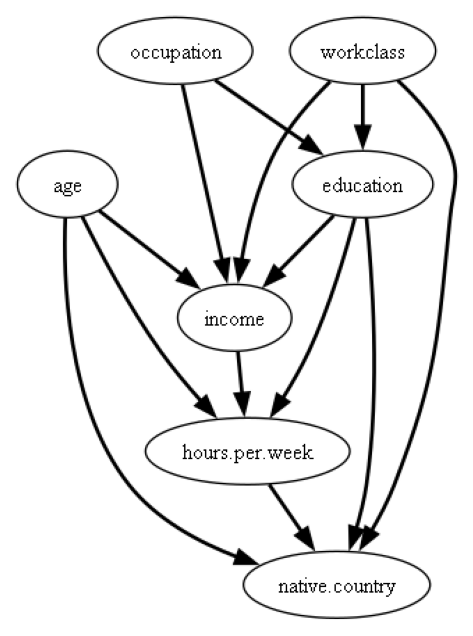

Evaluation of the first estimated graph:
Structural Hamming Distance (SHD): 29
Recall: 0.0
Precision: 0.0
Evaluation of the second estimated graph:
Structural Hamming Distance (SHD): 29
Recall: 0.0
Precision: 0.0
Evaluation of the third estimated graph:
Structural Hamming Distance (SHD): 29
Recall: 0.0
Precision: 0.0


In [10]:
main()